In [1]:
import numpy as np
from scipy.spatial import distance_matrix

import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../fem')
from GRF import *

ModuleNotFoundError: No module named 'GRF'

In [10]:
GRFparams = {'d': 2,
             'l_min': 0.01,
             'l_max': 0.01,
             'lowerbound': None,
             'upperbound': None}

In [11]:
grf = GRF(**GRFparams)

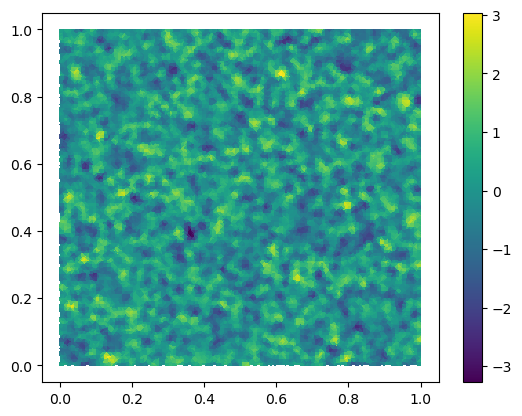

In [12]:
# func = GRF.RBFint()
X, Y = np.mgrid[0:1:100*1j, 0:1:100*1j]
x_i = np.vstack([X.ravel(), Y.ravel()]).T
grf.RBFint_scaled()(x_i)
plt.tripcolor(x_i[:,0], x_i[:,1], grf.RBFint_scaled()(x_i))
plt.colorbar()
# plt.scatter(grf.x_grid[:,0], grf.x_grid[:,1], color='black')
plt.savefig("GRF.svg", bbox_inches='tight', transparent=True)

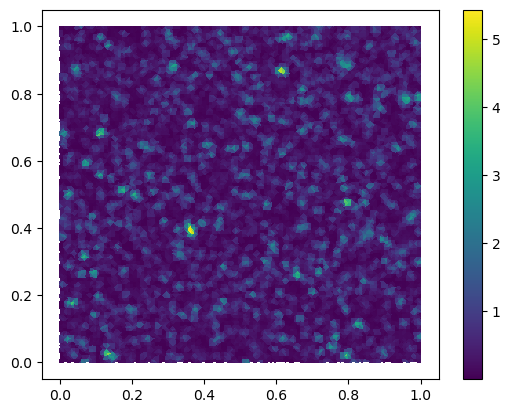

In [13]:
# func = GRF.RBFint()
X, Y = np.mgrid[0:1:100*1j, 0:1:100*1j]
x_i = np.vstack([X.ravel(), Y.ravel()]).T
grf.RBFint_scaled()(x_i)
plt.tripcolor(x_i[:,0], x_i[:,1], 0.5*(grf.RBFint_scaled()(x_i))**2)
plt.colorbar()
# plt.scatter(grf.x_grid[:,0], grf.x_grid[:,1], color='black')

plt.savefig("GRFsq.svg", bbox_inches='tight', transparent=True)

In [115]:
np.amin(0.5*(grf.RBFint_scaled()(x_i))**2)

3.308673399833002e-08

In [36]:
X, Y = np.mgrid[0:1:100*1j, 0:1:100*1j]
x_i = np.array([0.5,0.5])
GRF(**GRFparams).RBFint_pointwise_scaled()(x_i)

-0.6091839725745362

In [37]:
simparams = {'d': 2}
trainingdataparams = {'N_samples': 10000}

In [7]:
thetaparams = {'l': np.random.uniform(),
               'lowerbound': 0.02,
               'upperbound': None}

fparams = {'l': np.random.uniform(),
           'lowerbound': None,
           'upperbound': None}

etaparams = {'l': np.random.uniform(),
             'lowerbound': None,
             'upperbound': None}

inputs = {'theta': thetaparams,
               'f': fparams,
               'eta': etaparams}

trainingdataparams['inputs'] = inputs

In [14]:
grfset = GRFset(**simparams, **trainingdataparams, **inputs['theta'])